# Deterministic Models: Mass Balance

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

print("Packages imported")

Packages imported


## Learning Goals

* Apply the mass balance equation to a mathematical models of mass transfer
* Apply the nondimensionalization procedure and interpret dimensionless parameters
* Approximate solutions of first order systems of differential equations with SciPy

## Prelecture Readings

* [MATH 360 > Mass Balance](https://ubcmath.github.io/MATH360/deterministic/mass/index) including:
  * [Conservation of Mass](https://ubcmath.github.io/MATH360/deterministic/mass/conservation)
  * [Chemical Kinetics](https://ubcmath.github.io/MATH360/deterministic/mass/chemical)

## 3-Tank System

Consider a system of 3 tanks containing salt water solution (with different concentrations) such that each tank contains the same volume of solution and each flows into the others at the same constant rate. Construct a mathematical model of the system.

**Solution:**

**Problem Statement:**  Determine the mass of salt water solution in each tank as a function of time. 

Determine the time when the mass of salt in each tank is equal.

**Variables and Parameters**

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| mass of salt in tank 0 | $M_0$ | M | dependent variable |
| mass of salt in tank 1 | $M_1$ | M | dependent variable |
| mass of salt in tank 2 | $M_2$ | M | dependent variable |
| time | $t$ | T | independent variable |
| volume of solution in each tank | $V$ | L<sup>3</sup> | parameter |
| flow rate | $Q$ | L<sup>3</sup> T<sup>-1</sup> | parameter |
| initial mass of salt in tank 0 | $M_{0,0}$ | M | parameter|
| initial mass of salt in tank 1 | $M_{1,0}$ | M | parameter |
| initial mass of salt in tank 2 | $M_{2,0}$ | M | parameter |

**Assumptions and Constraints**

- Tanks are all the same shape
- New salt instantly mixes in the tanks
- Constant flow rate
- Enough fluid to dissolve the salt
- No impurities in the salt
- Constant volume
- Solution is well mixed (well-stirred)
- No water evaporates or leaks out

**Build Solutions:**

The mass flow rate from tank $i$ to tank $j$ is $Q M_i / V$. Apply the mass balance equation to each tank:

\begin{align*}
\frac{dM_0}{dt} &= -\frac{2 Q M_0}{V} + \frac{Q M_1}{V} + \frac{Q M_2}{V} \\
\frac{dM_1}{dt} &= \frac{Q M_0}{V} - \frac{2 Q M_1}{V} + \frac{Q M_2}{V} \\
\frac{dM_2}{dt} &= \frac{Q M_0}{V} + \frac{Q M_1}{V} - \frac{2 Q M_2}{V} \\
M_0(0) &= M_{0,0} \\
M_1(0) &= M_{1,0} \\
M_2(0) &= M_{2,0}
\end{align*}

Apply the nondimensionalization procedure. Let $M_0 = [M_0] M_0^*$, $M_1 = [M_1] M_1^*$, $M_2 = [M_2] M_2^*$, and $t = [t] t^*$. Make the substitution:

\begin{align*}
\frac{[M_0]}{[t]} \frac{dM_0^*}{dt^*} &= -\frac{2 Q [M_0] M^*_0}{V} + \frac{Q [M_1] M^*_1}{V} + \frac{Q [M_2] M^*_2}{V} \\
\frac{[M_1]}{[t]} \frac{dM_1^*}{dt^*} &= \frac{Q [M_0] M^*_0}{V} - \frac{2 Q [M_1] M^*_1}{V} + \frac{Q [M_2] M^*_2}{V} \\
\frac{[M_2]}{[t]} \frac{dM_2^*}{dt^*} &= \frac{Q [M_0] M^*_0}{V} + \frac{Q [M_1] M^*_1}{V} - \frac{2 Q [M_2] M^*_2}{V} \\
[M_0] M^*_0(0) &= M_{0,0} \\
[M_1] M^*_1(0) &= M_{1,0} \\
[M_2] M^*_2(0) &= M_{2,0}
\end{align*}

Choose the same scaling factor $[M]$ for each tank since the system is symmetric. Simplfy the equations:
\begin{align*}
\frac{[M]}{[t]} \frac{dM_0^*}{dt^*} &= -\frac{2 Q [M] M^*_0}{V} + \frac{Q [M] M^*_1}{V} + \frac{Q [M] M^*_2}{V} \\
\frac{[M]}{[t]} \frac{dM_1^*}{dt^*} &= \frac{Q [M] M^*_0}{V} - \frac{2 Q [M] M^*_1}{V} + \frac{Q [M] M^*_2}{V} \\
\frac{[M]}{[t]} \frac{dM_2^*}{dt^*} &= \frac{Q [M] M^*_0}{V} + \frac{Q [M] M^*_1}{V} - \frac{2 Q [M] M^*_2}{V} \\
[M] M^*_0(0) &= M_{0,0} \\
[M] M^*_1(0) &= M_{1,0} \\
[M] M^*_2(0) &= M_{2,0}
\end{align*}

The derivative and the terms on the left-hand side have the same order.  In these cases, our preference is to divide by the constant on the derivative term: i.e., by $\frac{[M]}{[t]}.$
\begin{align*}
\frac{dM^*_0}{dt^*} &= -\frac{2 Q [t] M^*_0}{V} + \frac{Q [t] M^*_1}{V} + \frac{Q [t] M^*_2}{V} \\
\frac{dM^*_1}{dt^*} &= \frac{Q [t] M^*_0}{V} - \frac{2 Q [t] M^*_1}{V} + \frac{Q [t] M^*_2}{V} \\
\frac{dM^*_2}{dt^*} &= \frac{Q [t] M^*_0}{V} + \frac{Q [t] M^*_1}{V} - \frac{2 Q [t] M^*_2}{V} \\
M^*_0(0) &= \frac{M_{0,0}}{[M]} \\
M^*_1(0) &= \frac{M_{1,0}}{[M]} \\
M^*_2(0) &= \frac{M_{2,0}}{[M]}
\end{align*}

Choose $[t] = V/Q.$  Notice how the $[M]$ cancels from the differential equation.  In these cases, we then look to the initial conditions to determine our $[M]$.  Here we have an option and will choose $[M] = M_{0,0}.$  Then:

\begin{align*}
\frac{dM^*_0}{dt^*} &= -2 M^*_0 + M^*_1 + M^*_2 \\
\frac{dM^*_1}{dt^*} &= M^*_0 - 2 M^*_1 + M^*_2 \\
\frac{dM^*_2}{dt^*} &= M^*_0 + M^*_1 - 2 M^*_2 \\
M^*_0(0) &= 1 \\
M^*_1(0) &= \mu_1 \\
M^*_2(0) &= \mu_2
\end{align*}

where $\mu_1 = \frac{M_{1,0}}{M_{0,0}}$ and $\mu_2 = \frac{M_{2,0}}{M_{0,0}}$.

**Analyze and Assess:**

The time scale $[t]$ is the time required to fill volume $V$ at rate $Q$ and the masses of salt are measured in multiples of the initial mass in tank 0. Note that the total mass of salt in the system remains constant $1 + \mu_1 + \mu_2$ and the system is symmetric therefore the steady state solution is an equal mass of salt in each tank:

$$
\frac{1 + \mu_1 + \mu_2}{3}.
$$

The idea here being that we have an initial amount of salt in each tank that amounts to $1, \mu_1$, and $\mu_2$.  Since the only flow is between the three tanks, our equilibrium solution should be when there is an even amount of salt in each of the three tanks. 

Plot some solutions:

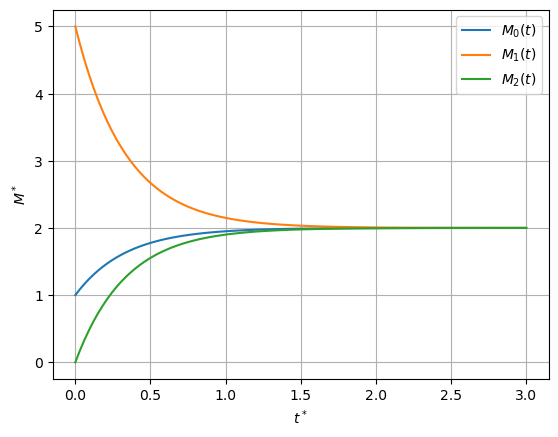

In [2]:
#DE function
def f(M,t):
    dMdt = np.array([0.,0.,0.])
    dMdt[0] = -2*M[0] + M[1] + M[2]
    dMdt[1] = -2*M[1] + M[0] + M[2]
    dMdt[2] = -2*M[2] + M[0] + M[1]
    return dMdt

#initial condition
M0 = [1,5,0]
#time vector
t = np.linspace(0,3,100)
#DE solution
M = spi.odeint(f,M0,t)

#plot
plt.plot(t,M[:,0],t,M[:,1],t,M[:,2]), plt.grid(True)
plt.legend(['$M_0(t)$','$M_1(t)$','$M_2(t)$'])
plt.xlabel('$t^*$')
plt.ylabel('$M^*$')
plt.show()

Some additional questions to consider for the analysis:
- How does the shape of the plots change as we change the initial condition?  Is this expected?
- How would the choice of $[M]$ impact our solution?
- What time does the tank system equilibrate at?  Does this depend on the initial concentration?
- Are the assumptions reasonable? Are we neglecting any information that should be considered?

## Law of Mass Action

What is the **law of mass action** and how do we use it to construct mathematical models?

- The reaction rate is proportional to the product of the reactance concentrations.
- Here our general form is that the rate of change is equal to the rate at which a species is produced minus the rate at which that species is consumed. 

Let $a(t)$ and $b(t)$ denote the concentrations of species $A$ and $B.$ Some examples of transforming a chemical reaction into differential equations through the law of mass action.  
\begin{align*}
A \overset{k}{\rightarrow} B & ~~~ \frac{d a(t)}{dt} =  - k a(t) \\
& ~~~ \frac{d b(t)}{dt} =   k a(t)\\
A \overset{k_+}{\underset{k_{-}}{\rightleftharpoons}} B & ~~~  \frac{d a(t)}{dt} = \overset{\rm Produces ~A}{k_- b(t)} ~~ - ~~ \overset{\rm Consumes ~A}{ k_+ a(t)}\\
& ~~~  \frac{d b(t)}{dt} = - k_- b(t) + k_+ a(t) \\
A \overset{k_+}{\underset{k_{-}}{\rightleftharpoons}} B \overset{k_2}{\rightarrow}  & ~~~  \frac{d a(t)}{dt} = k_- b(t) + k_+ a(t) \\
& ~~~  \frac{d b(t)}{dt} = -k_- b(t) + k_+ a(t) - k_2 b(t)
\end{align*}

## Hydrogenation of Ethylene

Create a mathematical model of the hydrogenation of ethylene ($C_2H_4$) into ethane ($C_2H_6$) given by the reactions

$$
\begin{align*}
H_2 & \overset{k_1}{\underset{k_{-1}}{\rightleftharpoons}} 2H \\
C_2H_4 + H & \overset{k_2}{\rightarrow} C_2H_5 \\
C_2H_5 + H & \overset{k_3}{\rightarrow} C_2H_6 \\
\end{align*}
$$

**Solution:**

**Problem Statement:** Determine the concentration of each species in the hydrogenation of ethylene as a function of t to simulate the reaction. 

**Variables and Parameters**

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| concentration of $H_2$ | $C_0$ | N L<sup>-3</sup> | dependent variable |
| concentration of $H$ | $C_1$ | N L<sup>-3</sup> | dependent variable |
| concentration of $C_2 H_4$ | $C_2$ | N L<sup>-3</sup> | dependent variable |
| concentration of $C_2 H_5$ | $C_3$ | N L<sup>-3</sup> | dependent variable |
| concentration of $C_2 H_6$ | $C_4$ | N L<sup>-3</sup> | dependent variable |
| time | $t$ | T | independent variable |
| reaction coefficient | $k_1$ | T<sup>-1</sup> | parameter |
| reaction coefficient | $k_{-1}$ | (N L<sup>-3</sup>)<sup>-1</sup> T<sup>-1</sup> | parameter |
| reaction coefficient | $k_2$ | (N L<sup>-3</sup>)<sup>-1</sup> T<sup>-1</sup> | parameter |
| reaction coefficient | $k_3$ | (N L<sup>-3</sup>)<sup>-1</sup> T<sup>-1</sup> | parameter |
| initial concentration of $H_2$ | $C_{0,0}$ | N L<sup>-3</sup> | parameter |
| initial concentration of $H$ | $C_{1,0}$ | N L<sup>-3</sup> | parameter |
| initial concentration of $C_2 H_4$ | $C_{2,0}$ | N L<sup>-3</sup> | parameter |
| initial concentration of $C_2 H_5$ | $C_{3,0}$ | N L<sup>-3</sup> | parameter |
| initial concentration of $C_2 H_6$ | $C_{4,0}$ | N L<sup>-3</sup> | parameter |

**Assumptions and Constraints**

* reaction starts with $H_2$ and $C_2 H_4$ only
* reaction coefficients are all positive
* there are no additional by-products
* there are no outside effects that help the reaction (e.g., catalysts)

**Build Solutions**

Apply the mass balance equation to each reactant and product:

\begin{align*}
\frac{dC_0}{dt} &= -k_1 C_0 + k_{-1} C_1^2 \\
\frac{dC_1}{dt} &= -2k_{-1} C_1^2 + 2k_1 C_0 - k_2 C_1 C_2 - k_3 C_1 C_3  \\
\frac{dC_2}{dt} &= -k_2 C_1 C_2 \\
\frac{dC_3}{dt} &= -k_3 C_1 C_3 + k_2 C_1 C_2 \\
\frac{dC_4}{dt} &= k_3 C_1 C_3 \\
C_0(0) &= C_{0,0} \quad C_2(0) = C_{2,0} \quad C_1(0) = C_3(0) = C_4(0) = 0
\end{align*}

Why the $2$'s in the $\frac{dC_1}{dt}$ term?  These are due to taking in to the account that the rate of change of $2$H results in a loss of $2$ H molecules and that the breakup of each H$_2$ molecule results in the appearance of $2$ H's.

Apply the nondimensionalization procedure. Let $C_0 = [C_0] C_0^*$, $C_1 = [C_1] C_1^*$, $C_2 = [C_2] C_2^*$, $C_3 = [C_3] C_3^*$, and $t = [t] t^*$. Make the substitutions:

$$
\begin{align*}
\frac{[C_0]}{[t]} \frac{dC^*_0}{dt^*} &= -k_1 [C_0] C^*_0 + k_{-1} [C_1]^2 C_1^{*2} \\
\frac{[C_1]}{[t]} \frac{dC^*_1}{dt^*} &= -2k_{-1} [C_1]^2 C_1^{*2} + 2k_1 [C_0]C^*_0 - k_2[C_1][C_2] C_1^* C_2^* - k_3[C_1][C_3] C_1^* C_3^*  \\
\frac{[C_2]}{[t]} \frac{dC^*_2}{dt^*} &= -k_2 [C_1][C_2]C_1^* C_2^* \\
\frac{[C_3]}{[t]} \frac{dC^*_3}{dt^*} &= -k_3 [C_1][C_3]C_1^* C_3^* + k_2 [C_1][C_2]C_1^* C_2^* \\
\frac{[C_4]}{[t]} \frac{dC^*_4}{dt^*} &= k_3 [C_1][C_3]C_1^* C_3^* \\
[C_0]C_0^*(0) &= C_{0,0} \quad [C_2]C_2^*(0) = C_{2,0} \quad C_1^*(0) = C_3^*(0) = C_4^*(0) = 0
\end{align*}
$$

We choose the same scaling factor for the concentrations $[C_0] = [C_1] = [C_2] = [C_3] = [C_4] = [C]$ and simplify

$$
\begin{align*}
\frac{dC^*_0}{dt^*} &= -k_1 [t] C^*_0 + k_{-1} [t] [C] C_1^{*2} \\
\frac{dC^*_1}{dt^*} &= -2k_{-1} [t] [C] C_1^{*2} + 2 k_1 [t] C^*_0 - k_2[t] [C] C^*_1 C^*_2 - k_3 [t] [C] C^*_1 C^*_3  \\
\frac{dC^*_2}{dt^*} &= -k_2 [t][C] C^*_1 C^*_2 \\
\frac{dC^*_3}{dt^*} &= -k_3 [t] [C] C^*_1 C^*_3 + k_2 [t] [C] C^*_1 C^*_2 \\
\frac{dC^*_4}{dt^*} &= k_3 [t] [C] C^*_1 C^*_3 \\
C^*_0(0) &= \frac{C_{0,0}}{[C]} \quad C^*_2(0) = \frac{C_{2,0}}{[C]} \quad C^*_1(0) = C^*_3(0) = C^*_4(0) = 0
\end{align*}
$$

From the $\frac{dC^*_0}{dt^*}$ equation, we choose $[t] = \frac{1}{k_1}$, and then using $[t]$ in the second term in the $\frac{dC^*_0}{dt^*}$ equation gives us $[C] = \frac{k_1}{k_{-1}}$.  Then we can write the system as

$$
\begin{align*}
\frac{dC^*_0}{dt^*} &= - C^*_0 + C_1^{*2} \\
\frac{dC^*_1}{dt^*} &= -2 C_1^{*2} + 2 C^*_0 - \kappa_2 C^*_1 C^*_2 - \kappa_3 C^*_1 C^*_3  \\
\frac{dC^*_2}{dt^*} &= -\kappa_2 C^*_1 C^*_2 \\
\frac{dC^*_3}{dt^*} &= -\kappa_3 C^*_1 C^*_3 + \kappa_2 C^*_1 C^*_2 \\
\frac{dC^*_4}{dt^*} &= \kappa_3 C^*_1 C^*_3 \\
C^*_0(0) &= \gamma_0 \quad C^*_2(0) = \gamma_2 \quad C^*_1(0) = C^*_3(0) = C^*_4(0) = 0
\end{align*}
$$

where $\kappa_2 = \frac{k_2}{k_{-1}}$ and $\kappa_3 = \frac{k_3}{k_{-1}}$. $\gamma_0 = \frac{k_{-1}C_{0,0}}{k_1}$ and $\gamma_2 = \frac{{k_{-1}C_{2,0}}}{k_1}$.

**Analyze and Assess**

Plot some solutions:

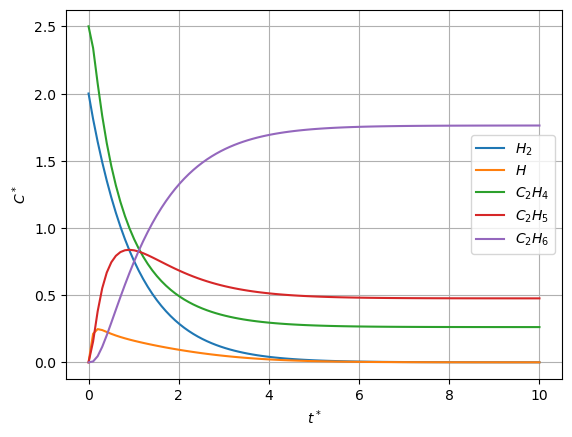

In [4]:
#parameter values
k2 = 5
k3 = 6
c0 = 2
c2 = 2.5

#DE function
def f(C,t):
    dCdt = np.array([0.,0.,0.,0.,0.])
    dCdt[0] = -C[0] + C[1]**2
    dCdt[1] = -2*C[1]**2 + 2*C[0] - k2*C[1]*C[2] - k3*C[1]*C[3]
    dCdt[2] = -k2*C[1]*C[2]
    dCdt[3] = -k3*C[1]*C[3] + k2*C[1]*C[2]
    dCdt[4] = k3*C[1]*C[3]
    return dCdt

#initial condition
C0 = [c0,0,c2,0,0]
#time vector
t = np.linspace(0,10,100)
#DE solution
C = spi.odeint(f,C0,t)
#plot
plt.plot(t,C[:,0],t,C[:,1],t,C[:,2],t,C[:,3],t,C[:,4])
plt.grid(True)
plt.legend(['$H_2$','$H$','$C_2H_4$','$C_2H_5$','$C_2H_6$'])
plt.xlabel('$t^*$')
plt.ylabel('$C^*$')
plt.show()

Some questions to help guide the analysis:
- how does the initial condition `C0` affect the solution output?
- how does the initialization of `k2 = 5; k3 = 6; c0 = 2; c2 = 2.5` affect the solution?
    - try plotting some solution curves with different values for `C0,k2,k3,c0,` and `c2` to see how these control the behaviour of the model
- what can we say about the long term behaviour of the concentrations? It may be helfpul to plot for a longer range of $t^*$ values here
- from the behaviour of the curves, how might we interpret the concentration profiles? Are some species generated more? Are some consumed more? 

## Epidemiology as Chemical Reactions

We can construct the familiar [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model) in epidemiology in terms of "chemical reactions" and the law of mass action. In particular, the first reaction is a susceptible person interacts with an infectious person to create 2 infectious persons, and the second reaction in the system is that an infectious person becomes a recovered person:

$$
\begin{align*}
S + I & \overset{k_1}{\rightarrow} 2I \\
I & \overset{k_2}{\rightarrow} R
\end{align*}
$$

Apply the law of mass action to find the system of equations:

$$
\begin{align*}
\frac{dS}{dt} &= -k_1 SI \\
\frac{dI}{dt} &= k_1SI - k_2 I \\
\frac{dR}{dt} &= k_2 I
\end{align*}
$$

Note that $k_1 = \beta/N$ and $k_2 = \gamma$ in the usual formulation of the model (where $N = S + I + R$).

Apply the same idea to construct a more complex model including vaccination and reinfection. Represent the system as a system of reactions:

$$
\begin{align*}
S + I & \overset{k_1}{\rightarrow} 2I \\
I & \overset{k_2}{\rightarrow} R \\
R & \overset{k_3}{\rightarrow} S \\
S & \overset{k_4}{\rightarrow} V
\end{align*}
$$

where $S$ is the susceptible population, $I$ is the infectious population, $R$ is the recovered population, $V$ is the vaccinated population.

**Solution:**

**Problem Statement:** Using the law of mass action, determine how to represent the SIR model, and then determine the population of $S, I, R,$ and $V$ as functions of time. 

**Variables and Parameters**

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| susceptible population | $S$ | N | dependent variable |
| infectious population | $I$ | N | dependent variable |
| recovered population | $R$ | N | dependent variable |
| vaccinated population | $V$ | N | dependent variable |
| time | $t$ | T | independent variable |
| reaction coefficient | $k_1$ | N<sup>-1</sup> T<sup>-1</sup> | parameter |
| reaction coefficient | $k_2$ | T<sup>-1</sup> | parameter |
| reaction coefficient | $k_3$ | T<sup>-1</sup> | parameter |
| reaction coefficient | $k_4$ | T<sup>-1</sup> | parameter |
| initial susceptible population | $S_0$ | N | parameter |
| initial infectious population | $I_0$ | N | parameter |
| initial recovered population | $R_0$ | N | parameter |
| initial vaccinated population | $V_0$ | N | parameter |

**Assumptions and Constraints**

* Assume the system begins with only susceptible and infectious persons
* Total population remains constant
* Spread of infection is only from infectious people 

**Build Solutions**

Apply the mass balance equation to each population

$$
\begin{align*}
\frac{dS}{dt} &= -k_1 SI + k_3 R - k_4 S \\
\frac{dI}{dt} &= k_1 SI - k_2 I \\
\frac{dR}{dt} &= k_2 I - k_3 R \\
\frac{dV}{dt} &= k_4 S \\
S(0) &= S_0 \quad I(0) = I_0 \quad R(0) = V(0) = 0
\end{align*}
$$

Apply the nondimensionalization procedure. Let $t = [t] t^*$, $S = [S]S^*$, $I = [I]I^*$, $R = [R]R^*$, $V = [V]V^*$. Make the substitutions:

$$
\begin{align*}
\frac{[S]}{[t]} \frac{dS^*}{dt^*} &= -k_1 [S][I] S^*I^* + k_3 [R] R^* - k_4 [S] S^* \\
\frac{[I]}{[t]} \frac{dI^*}{dt^*} &= k_1 [S][I]S^*I^* - k_2 [I]I^* \\
\frac{[R]}{[t]} \frac{dR^*}{dt^*} &= k_2 [I]I^* - k_3 [R]R^* \\
\frac{[V]}{[t]} \frac{dV^*}{dt^*} &= k_4 [S]S^* \\
[S]S^*(0) &= S_0 \quad [I]I^*(0) = I_0 \quad R^*(0) = V^*(0) = 0
\end{align*}
$$
The highest order term in the first two equations is the $S^*I^*$ term, where as in the last two equations the terms have the same order. From our previous analysis of the SIR model, we scaled each of the populations by the same factor.  Let's do that here in this case, and in particular,it may be beneficial to scale the populations by the total population $P = S_0 + I_0$. Therefore let $[S] = [I] = [R] = [V] = P$.  

Now that we have $[S],[I],[R],$ and $[V]$, using the second equation, we will determine $[t]$.  From this equation, we can cancel the $[I]$ from all of the terms.  Dividing through by $k_1 [S]$ as this is the coefficient on the highest order term gives the derivative a coefficient of $\frac{1}{k_1 [S][t]} \implies [t] = \frac{1}{k_1 P}$.  We can then write the nondimensionalized system as:

$$
\begin{align*}
\frac{dS^*}{dt^*} &= -S^*I^* + \kappa_3 R^* - \kappa_4 S^* \\
\frac{dI^*}{dt^*} &= S^*I^* - \kappa_2 I^* \\
\frac{dR^*}{dt^*} &= \kappa_2 I^* - \kappa_3 R^* \\
\frac{dV^*}{dt^*} &= \kappa_4 S^* \\
S^*(0) &= \sigma_0 \quad I^*(0) = 1 - \sigma_0 \quad R^*(0) = V^*(0) = 0
\end{align*}
$$

where

$$
\kappa_2 = \frac{k_2}{k_1 P}
\hspace{10mm}
\kappa_3 = \frac{k_3}{k_1 P}
\hspace{10mm}
\kappa_4 = \frac{k_4}{k_1 P}
\hspace{10mm}
\sigma_0 = \frac{S_0}{S_0 + I_0}
$$

**Analyze and Assess**

The dimensionless parameters measure the reaction rates relative to the infection rate $k_1 P$. Plot some solutions:

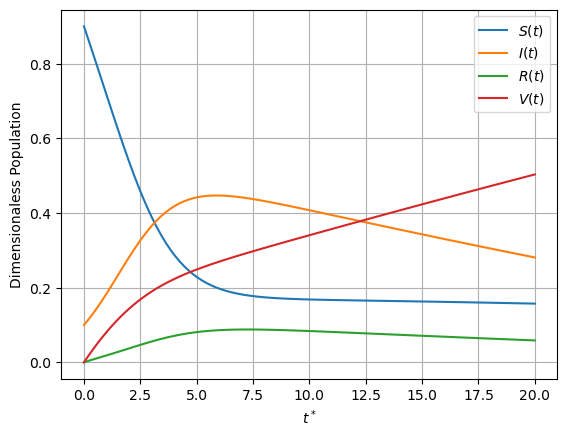

In [5]:
#parameter values
k2 = 0.2
k3 = 1
k4 = 0.1
s0 = 0.9

#DE function
def f(u,t):
    # u[0] = S, u[1] = I, u[2] = R, u[3] = V
    dudt = np.array([0.,0.,0.,0.])
    dudt[0] = -u[0]*u[1] + k3*u[2] - k4*u[0]
    dudt[1] = u[0]*u[1] - k2*u[1]
    dudt[2] = k2*u[1] - k3*u[2]
    dudt[3] = k4*u[0]
    return dudt

#initial condition
u0 = [s0,1-s0,0,0]
#time vector
t = np.linspace(0,20,100)
#DE solve
u = spi.odeint(f,u0,t)
#plot
plt.plot(t,u[:,0],t,u[:,1],t,u[:,2],t,u[:,3])
plt.grid(True)
plt.legend(['$S(t)$','$I(t)$','$R(t)$','$V(t)$'])
plt.xlabel('$t^*$')
plt.ylabel('Dimensionaless Population')
plt.show()

Some questions to help guide the analysis:
- how does the initial condition `u0` affect the solution output?
- how does the initialization of `k2 = 0.2; k3 = 1; k4 = 0.1; s0 = 0.9` affect the solution?
    - try plotting some solution curves with different values for `u0,k2,k3,k4,` and `s0` to see how these control the behaviour of the model
- what can we say about the long term behaviour of the populations? It may be helpful to plot for a longer range of $t^*$ values here
- is the behaviour of the populations consistent with what we would expect to happen in the model?
- is the assumption reasonable?

## Solution Draining from a Tank

Suppose a tank contains a salt water solution. The solution is drained from the bottom of the tank at a rate proportional to the pressure $\rho gh$ where $\rho$ is the density of the solution and $h$ is the height of the volume of solution in the tank. Suppose pure water is also flowing into the top of the tank at a rate that may change over time. Construct a mathematical model of the system.

**Solution:**

**Problem Statement:** Determine the height of the volume of the solution and the mass of the salt water in the tank as a function of time. 

**Variables and Parameters**

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| mass of salt | $M$ | M | dependent variable |
| volume of solution in the tank | $V$ | L<sup>3</sup> | dependent variable |
| height of solution in the tank | $h$ | L | dependent variable |
| density of the solution | $\rho$ | M L<sup>-3</sup> | dependent variable |
| time | $t$ | T | independent variable |
| density of water | $\rho_0$ | M L<sup>-3</sup> | parameter |
| flow rate of water | $Q$ | L<sup>3</sup> T<sup>-1</sup> | input |
| initial volume of solution | $V_0$ | L<sup>3</sup> | parameter |
| initial height of solution | $h_0$ | L | parameter |
| initial mass of salt | $M_0$ | M | parameter |
| cross-sectional area of tank | $A$ | L<sup>2</sup> | parameter |
| constant of gravity | $g$ | L T<sup>-2</sup> | parameter |
| flow rate constant | $\alpha$ | T L<sup>4</sup> M<sup>-1</sup> | parameter |
| initial mass of salt | $M_0$ | M | parameter |
| initial height of solution in the tank | $h_0$ | L | parameter |

**Assumptions and Constraints**

* adding salt to water does not change its volume
* density of solution is $\rho = \rho_0 + M/V$
* cross-sectional area of the tank is constant
* flow rate out is $\alpha \rho g h$ for some constant $\alpha$ with dimenions T L<sup>4</sup> M<sup>-1</sup>.

**Build Solutions**

The height of solution $h(t)$ and the density of the solution $\rho(t)$ is changing over time. Apply the balance equation to the volume $V(t) = A h(t)$ of solution in the tank

\begin{align*}
A \frac{dh}{dt} &= Q(t) - \alpha \rho g h \\
&= Q(t) - \alpha \left( \rho_0 + \frac{M}{hA} \right) g h\\
&= Q(t) - \alpha \rho_0 g h - \frac{ \alpha g M}{A}\\
\implies \frac{dh}{dt} &= \frac{Q(t)}{A} - \frac{ \alpha \rho_0 g h}{A} - \frac{ \alpha g M}{A^2}
\end{align*}

Apply the mass balance equation to the mass of salt in the tank:

\begin{align*}
\frac{dM}{dt} &= -\alpha \rho g h \frac{M}{hA} \\
&= -\frac{\alpha \left( \rho_0 + \frac{M}{hA} \right) g M}{A}\\
&= -\frac{\alpha \rho_0 g M}{A} - \frac{\alpha g M^2}{hA^2}
\end{align*}

Therefore we have a system:

\begin{align*}
\frac{dh}{dt} &= \frac{Q(t)}{A} - \frac{ \alpha \rho_0 g h}{A} - \frac{ \alpha g M}{A^2} \\
\frac{dM}{dt} &= -\frac{\alpha \rho_0 g M}{A} - \frac{\alpha g M^2}{hA^2} \\
h(0) &= h_0 \\
M(0) &= M_0
\end{align*}

Apply nondimensionalization procedure. Let $h = [h]h^*$, $M = [M] M^*$, $t = [t] t^*$, and $Q(t) = [Q] Q^*(t^*)$. Make the substitutions:

\begin{align*}
\frac{[h]}{[t]} \frac{dh^*}{dt^*} &= \frac{[Q] Q^*(t^*)}{A} - \frac{ \alpha \rho_0 g [h]h^*}{A} - \frac{ \alpha g [M]M^*}{A^2} \\
\frac{[M]}{[t]} \frac{dM^*}{dt^*} &= -\frac{\alpha \rho_0 g [M]M^*}{A} - \frac{\alpha g [M]^2 M^{*2}}{[h]h^*A^2} \\
[h] h^*(0) &= h_0 \\
[M] M^*(0) &= M_0
\end{align*}

Our terms in each differential equation have the same order.  In general, the preference is to then divide by the coefficient on the derivative term:

\begin{align*}
\frac{dh^*}{dt^*} &= \frac{[Q][t]}{A[h]} Q^*(t^*) - \frac{ \alpha \rho_0 g [t]}{A} h^* - \frac{ \alpha g [t][M]}{A^2 [h]} M^* \\
\frac{dM^*}{dt^*} &= -\frac{\alpha \rho_0 g [t]}{A} M^* - \frac{\alpha g [t][M]}{A^2 [h]} \frac{M^{*2}}{h^*} \\
h^*(0) &= \frac{h_0}{[h]} \\
M^*(0) &= \frac{M_0}{[M]}
\end{align*}

Now choose scaling factors.  In the $\frac{dh^*}{dt^*}$ and $\frac{dM^*}{dt^*} $ equations, $[t]$ is by itself (and the coefficient is the same!), so we will choose it to be $[t] = \frac{A}{\alpha \rho_0 g}.$  We will scale $[h]$ using the initial condition: $[h]= h_0.$  From the $\frac{dh^*}{dt^*}$, we can now determine $[Q]$ and $[M]$ from the first and third term on the right-hand side: $[Q] = \alpha \rho_0 g h_0$ and $[M] = \rho_0 h_0 A.$  Our scaling factors are then:

$$
[t] = \frac{A}{\alpha \rho_0 g}
\quad
[h] = h_0
\quad
[Q] = \alpha \rho_0 g h_0
\quad
[M] = \rho_0 h_0 A.
$$

Make subsitutions and write out the dimensionaless system:

\begin{align*}
\frac{dh^*}{dt^*} &= Q^*(t^*) - h^* - M^* \\
\frac{dM^*}{dt^*} &= - M^* - \frac{M^{*2}}{h^*} \\
h^*(0) &= 1 \\
M^*(0) &= \mu
\end{align*}

where $\mu = \frac{M_0}{\rho_0 h_0 A}$.

**Analyze and Assess:**

Note that $\mu$ is the ratio of the initial salt concentration $M_0/V_0$ to the density of pure water. Pure water has density $\rho_0 = 1000 kg/m^3$. Seawater has salt concentration $35 \ g/L$ = $35 kg/m^3$ which corresponds to $\mu = 0.035$.

The scaling factor $[Q]$ is the flow rate of pure water draining from the tank with the initial volume.

Plot some solutions:

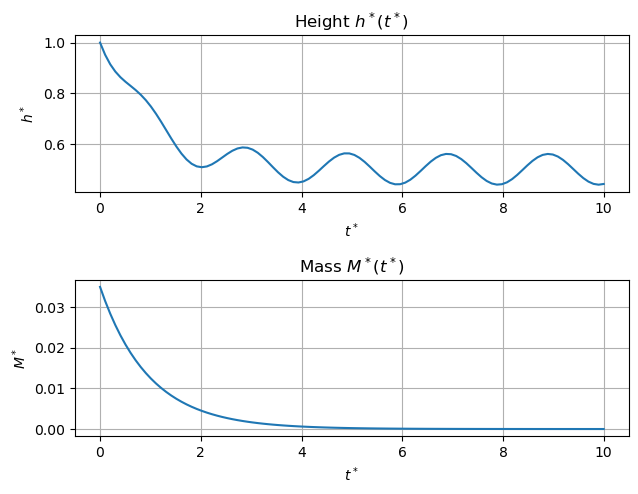

In [6]:
#parameter
mu = 0.035

#flow rate of pure water
Q = lambda t: 0.2*np.sin(np.pi*t) + 1/2

#differential equation
# Let u[0] = h and u[1] = M
f = lambda u,t: np.array([Q(t) - u[0] - u[1], -u[1] - u[1]**2/u[0]])

#initial condition
u0 = [1,mu]
#time vector
t = np.linspace(0,10,100)

#DE solution
u = spi.odeint(f,u0,t)
#plot
plt.subplot(2,1,1)
plt.plot(t,u[:,0]), plt.grid(True)
plt.title('Height $h^*(t^*)$')
plt.xlabel('$t^*$')
plt.ylabel('$h^*$')
plt.subplot(2,1,2)
plt.plot(t,u[:,1]), plt.grid(True)
plt.title('Mass $M^*(t^*)$')
plt.tight_layout()
plt.xlabel('$t^*$')
plt.ylabel('$M^*$')
plt.show()

Some questions to help guide the analysis:
- how does the initial condition `u0` affect the solution output?
- how does the initialization of `mu` affect the solution?
    - try plotting some solution curves with different values for `u0` and `mu` to see how these control the behaviour of the model
- how does the input function for `Q` affect the solution? Is this something we would want to make an assumption on or perhaps get input from data on?
- what can we say about the long term behaviour of the curves? It may be helpful to plot for a longer range of $t^*$ 
- is it reasonable to assume that adding salt to the water does not changes its volume? Is there a tipping point for when we may want to change this assumption?
- are our other assumptions reasonable and/or have a strong impact on the output of the model?